In [1]:
from optimum.onnxruntime import ORTStableDiffusionPipeline
import numpy as np
import time
np.random.seed(0)

model_2 = '../sd_v15_onnx'
model_id = "../sd_v15_2_onnx"
pipeline = ORTStableDiffusionPipeline.from_pretrained(model_id).to('cuda:0')
pipeline_2 = ORTStableDiffusionPipeline.from_pretrained(model_2).to('cuda:1')

/home/xwh/miniconda3/envs/optimum/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-06 18:35:44.249651042 [W:onnxruntime:, transformer_memcpy.cc:74 ApplyImpl] 1 Memcpy nodes are added to the graph main_graph for CUDAExecutionProvider. It might have negative impact on performance (including unable to run CUDA graph). Set session_options.log_severity_level=1 to see the detail logs before this message.
2024-08-06 18:35:44.251350567 [W:onnxruntime:, session_state.cc:1166 VerifyEachNodeIsAssignedToAnEp] Some nodes were not assigned to the preferred execution providers which may or may not have an negative impact on performance. e.g. ORT explicitly assigns shape related ops to CPU to improve perf.
2024-08-06 18:35:44.251359341 [W:onnxruntime:, session_state.cc:1168 VerifyEachNodeIsAssignedToAnEp] Rerunn

In [3]:
prompt = ["sailing ship in storm by Leonardo da Vinci"] * 3
st = time.perf_counter()
image = pipeline(prompt,num_inference_steps=[30, 30, 30]).images
print(time.perf_counter() - st)

  0%|          | 0/30 [00:00<?, ?it/s]

 97%|█████████▋| 29/30 [00:05<00:00,  5.51it/s]


5.484305111691356


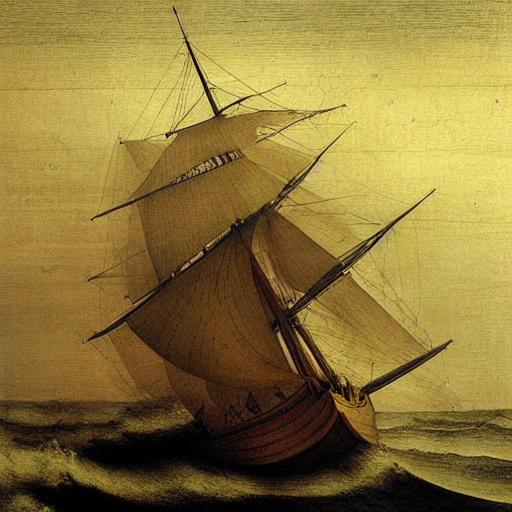

In [13]:
image[0]

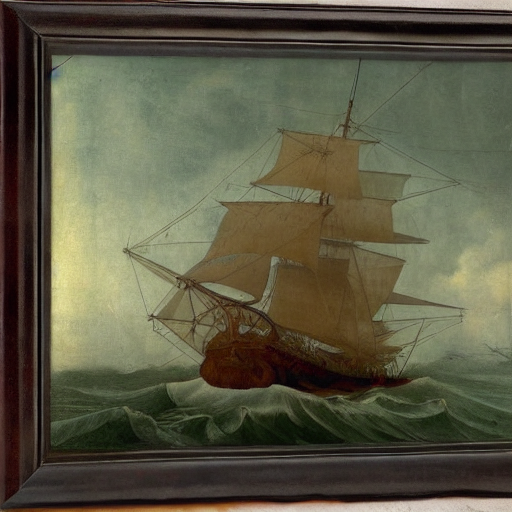

In [14]:
image[1]

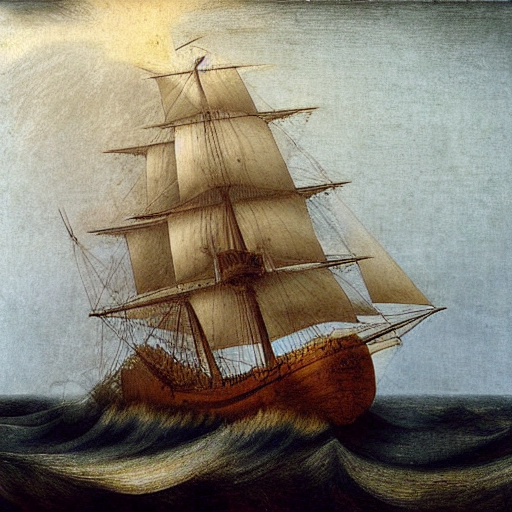

In [15]:
image[2]

In [6]:
prompt = ["sailing ship in storm by Leonardo da Vinci"] * 3
st = time.perf_counter()
image = pipeline_2(prompt,num_inference_steps=30).images
print(time.perf_counter() - st)

Original


  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 31/31 [00:05<00:00,  5.69it/s]


5.677565298043191


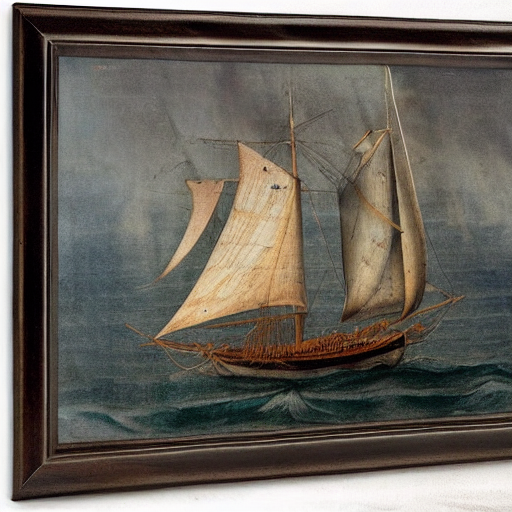

In [11]:
image[2]